# 逻辑回归 Logistic Regression
## 算法实现 implementation of algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

### 数据集 Dataset

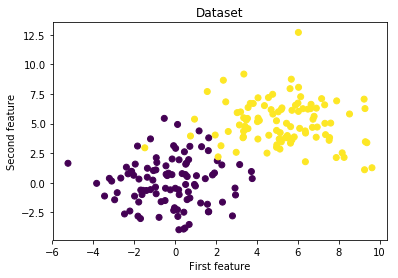

In [2]:
centers = [(0, 0), (5, 5)]
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=2, centers=centers, shuffle=False, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
class LogisticRegression():
    def __init__(self):
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X_train, y_train, learning_rate=0.01, n_iters=1000):
        if y_train.ndim == 1:
            y_train.shape = (-1,1)
        n_samples, n_features = X_train.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        for i in range(n_iters):
            y_predict = self.sigmoid(np.dot(X_train, self.weights) + self.bias)
            cost = (- 1 / n_samples) * np.sum(y_train * np.log(y_predict) + (1 - y_train) * (np.log(1 - y_predict)))
            # 梯度下降算法
            dw = (1 / n_samples) * np.dot(X_train.T, (y_predict - y_train))
            db = (1 / n_samples) * np.sum(y_predict - y_train)
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
            
        return self.weights, self.bias

    def predict(self, X_test):
        y_predict = self.sigmoid(np.dot(X_test, self.weights) + self.bias)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]
        return y_predict_labels
    
    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return np.mean(np.where(y_predict == y_test, 1, 0))

In [4]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.86

### 决策边界可视化 Visualize decision boundary

In [5]:
def plot_decision_boundary(clf, X, y): 
    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z =  np.array(clf.predict(np.c_[xx.ravel(), yy.ravel()]) )
    Z = Z.reshape(xx.shape)

    from matplotlib.colors import ListedColormap
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    plt.contourf(xx, yy, Z, cmap=cmap_light)

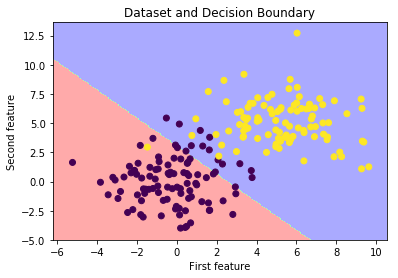

In [6]:
plot_decision_boundary(clf,X,y)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset and Decision Boundary")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

## scikit-learn

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
y_train.shape = (-1,) # 修改为 1d array 避免警告
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)

0.92

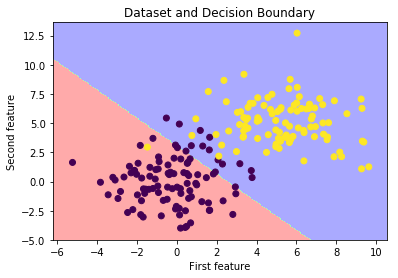

In [9]:
plot_decision_boundary(clf,X,y)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset and Decision Boundary")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()